In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso 
from sklearn import metrics 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [2]:
#exploring the data set
train= pd.read_csv("../input/vehicle-dataset-from-cardekho/car data.csv")
train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
#checking the data frame
train.shape

(301, 9)

In [4]:
#gathering information about dataset
train.info()
#no missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
#checking distribution of categorical data
print(train.Fuel_Type.value_counts())
print(train.Seller_Type.value_counts())
print(train.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [6]:
#encoding the categorical data
train.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
train.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
train.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)
train.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [7]:
#splitting the data and target
Y=train['Selling_Price']
X=train.drop(['Car_Name','Selling_Price'],axis=1)

In [8]:
#splitting train and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)



In [9]:
#MODEL TRAINING USING LINEAR REGRESSION
lin_reg_model=LinearRegression()


In [10]:
#fit is used to fit the training model in the line
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [11]:
#ModelEvaluation
#prediction on training data
training_dataprediction=lin_reg_model.predict(X_train)


In [12]:
#Calculating R squared error
error_score=metrics.r2_score(Y_train,training_dataprediction)
print(error_score)

0.8799451660493711


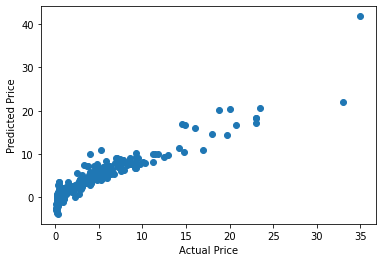

In [13]:
#Visualize actual price and predicted price
plt.scatter(Y_train,training_dataprediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [14]:
#prediction on test data
test_data_prediction=lin_reg_model.predict(X_test)


In [15]:
#calculate r squared error
error_test=metrics.r2_score(Y_test,test_data_prediction)
print(error_test)

0.8365766715027051


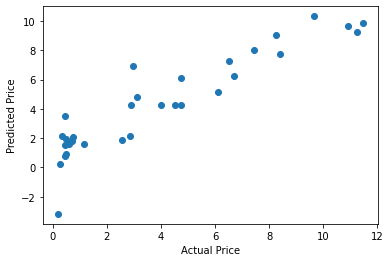

In [16]:
#Visualize actual price and predicted price
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [17]:
#lasso regression
lass_reg_model=Lasso()
lass_reg_model.fit(X_train,Y_train)


Lasso()

In [18]:
training_dataprediction=lass_reg_model.predict(X_train)

In [19]:
error_score=metrics.r2_score(Y_train,training_dataprediction)
print(error_score)

0.8427856123435794


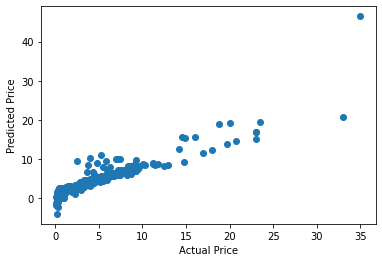

In [20]:
plt.scatter(Y_train,training_dataprediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [21]:
test_data_prediction=lass_reg_model.predict(X_test)


In [22]:
error_test=metrics.r2_score(Y_test,test_data_prediction)
print(error_test)

0.8709167941173195


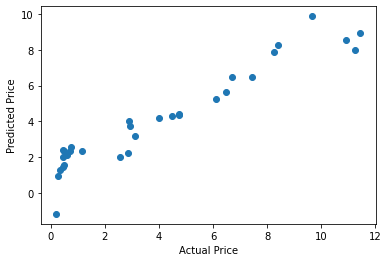

In [23]:
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()